In [211]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [212]:
# Parameters

l = 100 #Size of the grid
A = 0.1  #Maximum cell number
σ = 10 #Width of the tumor 
delta_t = 0.1
delta_x = 1
D = 1
Alpha_zero = 1
N_Max = 1

In [213]:
#  l x l matrix initialized to zeros
matrix = np.zeros((l, l))


In [214]:
# Fill the matrix with the Gaussian distribution
for i in range(l):
    for j in range(l): 
        exponent = - ((i - l/2)**2 + (j - l/2)**2) / (2 * σ**2)
        matrix[i, j] = A*np.exp(exponent)

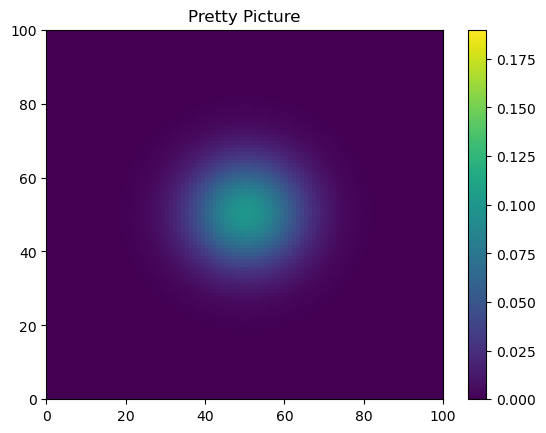

In [215]:
# Display the matrix using plt.pcolor
plt.pcolor(matrix, cmap='viridis')
plt.clim(0,0.19)
plt.colorbar()# Adds a colorbar to the plot
plt.title('Pretty Picture')
plt.show()

In [216]:
matrix_next = np.zeros((l,l))
num_step = 60
# Simulation loop over time
for time in range(num_step):
    # Loop over each point in the grid
    for i in range(l):
        for j in range(l):
            # Define i1, i2, j1, j2 for the neighboring points with periodic boundary conditions
            i1 = (i + 1) % l
            i2 = (i + l - 1) % l
            j1 = (j + 1) % l
            j2 = (j + l - 1) % l
            # Apply the diffusion equation to compute matrix_next(i, j)

            matrix_next[i, j] = matrix[i, j] + delta_t * (D * (delta_t / delta_x) * (matrix[i1, j] + matrix[i2, j] + matrix[i, j1] + matrix[i, j2] - 4 * matrix[i, j] + (Alpha_zero * matrix[i,j]) * (1 - matrix[i,j] / N_Max)))
# Update the matrix for the next time step
    matrix = np.copy(matrix_next)

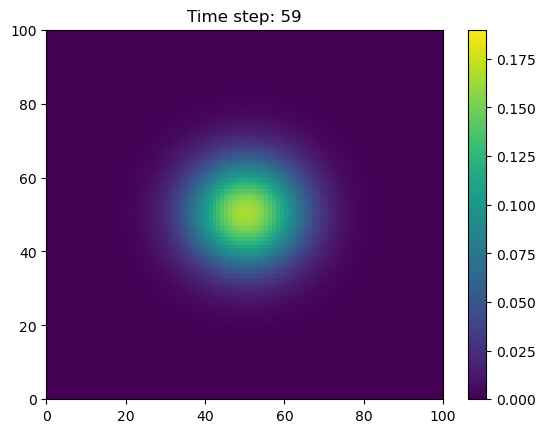

In [217]:
 # Optionally: Visualize the result at every time step
plt.pcolor(matrix, cmap='viridis')
plt.clim(0,0.19) # THe color reference is the same for the two plots so the yellow in the pretty picture is the same in the time step
plt.colorbar()
plt.title(f'Time step: {time}')
plt.show()